## Övning 5.3

Uppgiften lyder
<img src="img/exe5.3.png">

In [22]:
import pandas as pd
import numpy as np

stickprov = [[0,5,10,15,20,25,30],[0.003,0.127,0.251,0.390,0.498,0.625,0.763]]
data = pd.DataFrame(np.transpose(stickprov),columns=["Silver","Absorbance"])
data

,Silver,Absorbance
0,0.0,0.003
1,5.0,0.127
2,10.0,0.251
3,15.0,0.390
4,20.0,0.498
5,25.0,0.625
6,30.0,0.763


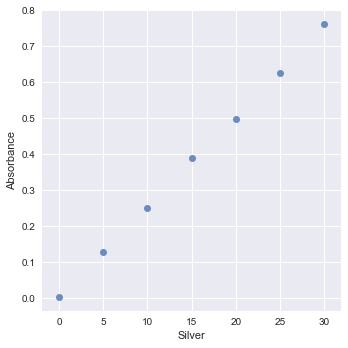

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
g = sns.lmplot(data=data,x="Silver",y="Absorbance",fit_reg=False)


Vi gör elementvis summering, för att bestämma regressions koefficienter enl ekvation 5.4.1 och 5.4.2.

In [24]:
antal, sum_x, sum_y = 0,.0,.0
for row in data.itertuples():
    sum_x += row[1]
    sum_y += row[2]
    antal += 1
mean_x,mean_y = sum_x/antal, sum_y/antal
sum_xy, sum_xx = .0,.0
for row in data.itertuples():
    sum_xy += (row[1]-mean_x)*(row[2]-mean_y)
    sum_xx += (row[1]-mean_x)**2

b = sum_xy/sum_xx
a = mean_y-b*mean_x

print "Regressions linje given av y= %.3f * x + %.3f" % (b,a)


Regressions linje given av y= 0.025 * x + 0.002


Vi använder sedan ekvation 5.5.1, 5.5.2 och 5.5.3 för att räkna ut standardfel och 95% konfidens intevall för regressions koefficienterna 

In [25]:
sum_yyhat,sum_xx_bare = 0.,0.
for row in data.itertuples():
    sum_yyhat += (row[2]-(row[1]*b+a))**2
    sum_xx_bare += (row[1])**2

s_yx = np.sqrt(sum_yyhat/(antal-2))
sb = s_yx/np.sqrt(sum_xx)
sa = s_yx*np.sqrt(sum_xx_bare/(antal*sum_xx))

from scipy.stats import t
t_kritisk = t.ppf(1-0.05/2,antal-2)

print "a = %.4f+-%.4f, b = %.4f+-%.4f" % (a,sa*t_kritisk,b,sb*t_kritisk)

a = 0.0021+-0.0123, b = 0.0252+-0.0007


## Upgift 5.4
Uppgiften lyder
<img src="img/exe5.4.png">

a. Vi kan först räkna ut vår uppskattning av vad vår mätpunkt motsvarar för koncentration. $\hat{x}_0=\frac{y_0-a}{b}$

In [26]:
x_0 = (0.456-a)/b

a. Vi använder ekvation 5.6.1 för att räkna ut $s_{x_0}$

In [33]:
s_x0 = s_yx/b * np.sqrt(1+1./antal+(0.456-mean_y)**2/((b**2)*sum_xx))
s_x0

0.30019766465289022

Vårt konfidensintervall fås ur $x_0=\hat{x}_0 \pm s_{\hat{x}_0}\cdot t_{n-2}$

In [35]:
print "x_0 = %.2f+-%.2f" % (x_0,s_x0*t_kritisk)

x_0 = 12.29+-0.77


b. Det uppmätta värdet 0.347 ser ut att vara en utliggare. Vi testar det med Dixons test. Q=("misstänkt värde"-"närmaste värde")/(max()-min())

In [36]:
Q=(0.347-0.314)/(0.347-0.308)
Q

0.8461538461538459

Enligt tabell A.6 så är kritiskt värde 0.829. Vi kan alltså anta att 0.347 är en utlggare, och exkludera det från stickprovet.

Vi räknar ut medelvärdet för de tre återstående punkterna och bestämmer standard avvikelsen för $\hat{x}_0$ med 5.6.2

In [38]:
y_0 = np.mean([0.308,0.312,0.314])
x_0 = (y_0-a)/b
s_x0 = s_yx/b * np.sqrt(1./antal+1./3.+(y_0-mean_y)**2/((b**2)* sum_xx))
print "x_0 = %.2f+-%.2f" % (x_0,s_x0*t_kritisk)


x_0 = 12.29+-0.50
